In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, RobustScaler
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from keras import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils

# load the dataset
df = pd.read_csv('model_data.csv')

y = df.univName                 # Name of the University is our target
x = df.drop('univName',axis=1)  # Remove University name to get parameters

# Label the University names to perform SMOTE
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)

x1 = pd.get_dummies(x)

# Perform over_sampling to balance the dataset
smote = SMOTE(sampling_strategy='not majority')
X1, Y1 = smote.fit_sample(x1,encoded_Y)

# Scale the values
sc = RobustScaler()       # Robust scaler takes care of outliers as well
X = sc.fit_transform(X1)

# One-hot encoding of the University Names
Y = np_utils.to_categorical(Y1)

# Make the train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42,shuffle=True)


In [ ]:
X_train.head()

In [3]:
X_test

array([[ 0.00000000e+00,  0.00000000e+00,  7.23419798e-01, ...,
         1.14667683e+00,  8.02771176e-01, -4.85744752e+00],
       [ 0.00000000e+00,  0.00000000e+00,  6.08351175e-01, ...,
         4.08816275e-01,  6.22477348e-01,  1.17235382e+00],
       [ 0.00000000e+00,  0.00000000e+00,  4.31184873e-01, ...,
         8.24845667e-01, -6.71325121e-01,  5.69727711e-03],
       ...,
       [ 0.00000000e+00,  0.00000000e+00,  4.06867874e-01, ...,
         9.03640886e-01,  3.17519809e-01,  6.78186125e-01],
       [ 0.00000000e+00,  2.00000000e+01, -8.41507976e-01, ...,
        -4.56169803e-01, -8.13586357e-01, -4.08289377e-01],
       [ 0.00000000e+00,  0.00000000e+00, -1.32310196e+00, ...,
        -1.21818657e+00,  4.56846937e-01, -1.48997562e-01]])

1075/1075 [==============================] - 1s 837us/step - loss: 0.7132 - accuracy: 0.7552
Accuracy:  0.7551690936088562
[ 5 10 12 ... 34  6 15]


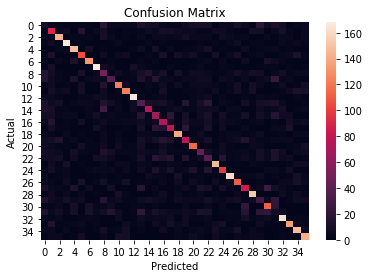

In [4]:
################################ Make multi-class Classifier Model #####################################################

classifier = Sequential()
classifier.add(Dense(400, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(800, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(100, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(36, activation='softmax', kernel_initializer='random_normal'))
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.fit(X_train,Y_train,batch_size=20,epochs=200,verbose=0)
eval_model = classifier.evaluate(X_train,Y_train)
print("Accuracy: ",eval_model[1])     # accuracy = 0.7864

# Get the predicted class for each test sample
y_pred = classifier.predict_classes(X_test)
print(y_pred)

# Generate confusion matrix to see the performance of classifier in classifying correctly
cm = confusion_matrix(Y_test.argmax(axis=1),y_pred)
ax = plt.subplot()
sns.heatmap(cm,annot=False,ax=ax);
ax.set_xlabel('Predicted');
ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
plt.show()


In [6]:
import joblib
joblib.dump(classifier, 'classifier_model.pkl')

['classifier_model.pkl']

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [13]:
print("accuracy: {}".format(accuracy_score(Y_test, y_pred)))

accuracy: 0.2389205536815168


In [22]:
# #Import svm model
# from sklearn import svm

# #Create a svm Classifier
# clf = svm.SVC(kernel='linear') # Linear Kernel

# #Train the model using the training sets
# clf.fit(X_train, Y_train)

# #Predict the response for test dataset
# y_pred = clf.predict(X_test)

# # #Import scikit-learn metrics module for accuracy calculation
# # from sklearn import metrics

# # # Model Accuracy: how often is the classifier correct?
# # print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

In [ ]:
################################ Make multi-class Classifier Model #####################################################

classifier = Sequential()
classifier.add(Dense(200, activation='relu', kernel_initializer='random_normal', input_dim=X_test.shape[1]))
classifier.add(Dense(600, activation='relu', kernel_initializer='random_normal'))
# classifier.add(Dense(100, activation='relu', kernel_initializer='random_normal'))
classifier.add(Dense(36, activation='softmax', kernel_initializer='random_normal'))
classifier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

classifier.fit(X_train,Y_train,batch_size=20,epochs=200,verbose=0)
eval_model = classifier.evaluate(X_train,Y_train)
print("Accuracy: ",eval_model[1])     # accuracy = 0.7864

# Get the predicted class for each test sample
y_pred = classifier.predict_classes(X_test)
print(y_pred)

# Generate confusion matrix to see the performance of classifier in classifying correctly
cm = confusion_matrix(Y_test.argmax(axis=1),y_pred)
ax = plt.subplot()
sns.heatmap(cm,annot=False,ax=ax);
ax.set_xlabel('Predicted');
ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
plt.show()
